# I'm just gonna see if I can write a quick and dirty kepler-planet function thing

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [9]:
from kepler_data_table_to_new_planet_system import read_convert_new_system

In [10]:
filename = 'planets_2019.07.30_19.22.04.csv' # make sure you have this new file

What are the possible names?

Uploading new planets list:

In [11]:
planets = pd.read_csv(filename, 
                     sep=",", comment="#")

In [12]:
planets['pl_hostname'].unique()

array(['11 Com', '11 UMi', '14 And', ..., 'tau Gem', 'ups And', 'xi Aql'],
      dtype=object)

We want one with a few planets.  We can play with the table under the exoplanet arxiv: https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=planets

Or lets try looking at some to see what they have in their entries:

In [13]:
name = '11 Com' # try first one

mask = planets['pl_hostname'] == name
# how many planets? lets see how long the eccentricity list is:
planets['pl_orbeccen'][mask]

0    0.231
Name: pl_orbeccen, dtype: float64

Well this one only has 1 planet, so let's try another name:

In [14]:
name = 'ups And' # try first one

mask = planets['pl_hostname'] == name
# how many planets? lets see how long the eccentricity list is:
planets['pl_orbeccen'][mask]

4021    0.0215
4022    0.2596
4023    0.2987
Name: pl_orbeccen, dtype: float64

Ok, this one has a few planets, so let's check it out.

In [15]:
new_kepler_data = read_convert_new_system(filename, 'ups And')
new_kepler_data

{'SysName': 'ups And',
 'NumberOfPlanets': 3,
 'Porb': array([   4.617033,  241.258   , 1276.46    ]),
 'a': array([0.059222, 0.827774, 2.51329 ]),
 'ecc': array([0.0215, 0.2596, 0.2987]),
 'Incl': array([0., 0., 0.]),
 'pMass': array([0.6876, 1.981 , 4.132 ]),
 'sMass': array([1.3, 1.3, 1.3]),
 'tTime': array([2450005.368, 2450157.78 , 2451347.48 ])}

We can convert this now just like we did before:

In [18]:
from convert_kepler_data import convert_kepler_data
star_mass, planet_mass, planet_initial_position, planet_initial_velocity, ecc = convert_kepler_data(new_kepler_data)

Then we can use these again as inputs into our hermite solver.

In [19]:
from hermite_library import do_hermite

In [22]:
r_h, v_h, t_h, E_h = do_hermite(star_mass,
                               planet_mass,
                               planet_initial_position,
                               planet_initial_velocity,
                               tfinal=1e4*5000,
                               Nsteps=5000, threeDee=True)

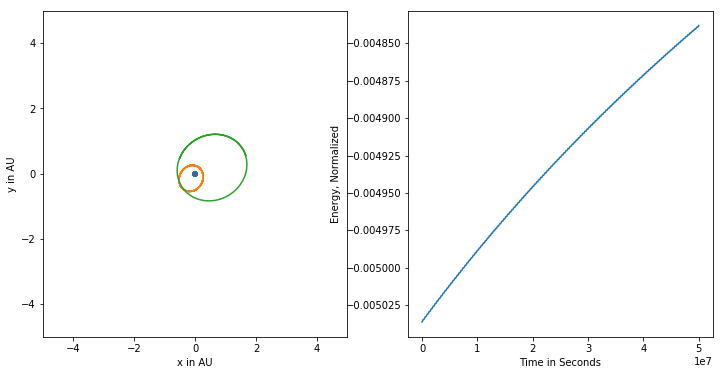

In [23]:

# we are doing 1 row of plots with 2 columns of plots
# and making sure that our plot is 2X as wide as long
fig, ax = plt.subplots(1,2, figsize=(6*2, 6))

for i in range(r_h.shape[0]): # loop over number of planets+star
    ax[0].plot(r_h[i, 0, :], r_h[i, 1, :])

# making extra fancy with labels
ax[0].set_xlabel('x in AU')
ax[0].set_ylabel('y in AU')
# also set a different-than-default size
ax[0].set_xlim(-5, 5)
ax[0].set_ylim(-5, 5)

# now I'll make energy as a function of time
ax[1].plot(t_h, E_h)
ax[1].set_xlabel('Time in Seconds')
ax[1].set_ylabel('Energy, Normalized')

plt.show()